### Linear regression 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import *

### Data generation
First we need to create our x data and y data. We want to find the parameters a and b for the fuction $y = a*x + b $ Our parameters a and b are known, $a = 1.65$ and $b = 3.8$. In addition we add some random noise with mean 0 and standard deviation 8 to the target y.

In [2]:
np.random.seed(seed=22)
N = 50
x_data = (np.linspace(0,50,N)).astype('float32')
y_data = ((1.65 * x_data) + 3.8 + np.random.normal(0,8,N)).astype('float32')

This is the function with and without gaussian noise

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


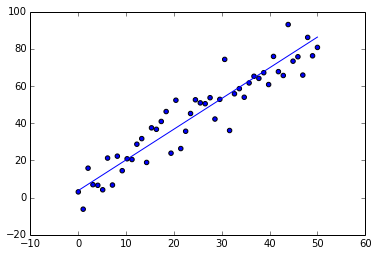

In [3]:
plt.scatter(x_data,y_data)
plt.plot(x_data,(1.65*x_data)+3.8)

### RSS Minimization by trying

Fit a linear function to the data and calculate residual sum of squares (RSS). Play around with the sliders so that the RSS is minimized. As a technical detail, we use the mean instead of the sum to be indpendent of the number of data points.

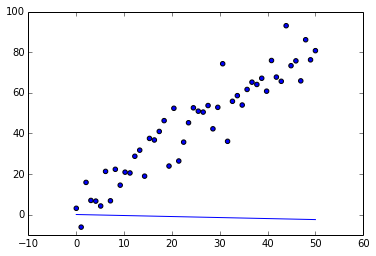

Loss 2728.83959961


<function __main__.linreg>

In [4]:
def linreg(a,b):
    plt.scatter(x_data,y_data)
    plt.plot(x_data,a*x_data+b)
    plt.xlim((-10, 60))
    plt.ylim((-10, 100))
    plt.show()
    print("Loss {}".format(np.mean(np.square(y_data-(a*x_data+b)))))

interact(linreg,a=(-5,5,0.05),b=(-50,50,1))

### Linear regression in TensorFlow, feeding data  

In [5]:
# Defining the graph (construction phase)
tf.reset_default_graph()
a = tf.Variable(1.0, name = 'a') 
b = tf.Variable(1.0, name = 'b')
x = tf.placeholder('float32', [N], name='x_data')
y = tf.placeholder('float32', [N], name='y_data')
loss = tf.reduce_mean(tf.square(a*x + b - y)) #Average is called reduce_mean

init_op = tf.global_variables_initializer() 
# Initialization ('symbolic'), this creates a new operation in the graph. Which
# initializes the graph. We call this later, when we have a concrete realization of the graph

Now feed your optimal parameters from above through the tensorflow graph and compare the "loss" with the RSS 

In [6]:
# Working with a concrete realization (launching a graph). 
# A session sess is created  with the with construct 
# the session is closed, when moving out of the with class
with tf.Session() as sess: 
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    res = sess.run(loss, feed_dict={x:x_data, y:y_data, a:1.7, b:1.55}) #Evaluation loss using the provided data
    writer = tf.summary.FileWriter("/tmp/linreg", sess.graph, 'dumm.pbtxt') 
    writer.close()
    print("Loss {} (a=1.7, b=1.55)".format(res))

Loss 70.2787322998 (a=1.7, b=1.55)


### Linear regression with TensorFlow, optimization
Now let tensorflow do the work and find the optimal values for a and b to minimize the loss

In [7]:
train_op = tf.train.GradientDescentOptimizer(0.0001).minimize(loss) #A new activity doing one optimization step 

# when called.
# Other optimizers 
#train_op = tf.train.AdamOptimizer().minimize(loss) 
#train_op = tf.train.MomentumOptimizer(0.0001, 0.9).minimize(loss)

epochs = 5000
results = np.zeros((epochs, 4))
init_op = tf.global_variables_initializer() #Initialization
with tf.Session() as sess:
    sess.run(init_op) #Running the initialization
    for e in range(epochs): #Fitting the data for some epochs
        res = sess.run([train_op, loss, a, b], feed_dict={x:x_data, y:y_data})  
        results[e] = res
        if ((e < 5) | (e > epochs-5)):
            print("Epoch{} Loss {} (a={}, b={})".format(e+1,res[1],res[2],res[3]))
    res = sess.run([loss, a, b], feed_dict={x:x_data, y:y_data})

Epoch1 Loss 479.241638184 (a=1.1172491312, b=1.00368571281)
Epoch2 Loss 353.226959229 (a=1.21473884583, b=1.0067845583)
Epoch3 Loss 266.104522705 (a=1.29579901695, b=1.00939524174)
Epoch4 Loss 205.870956421 (a=1.36319828033, b=1.01160013676)
Epoch5 Loss 164.227355957 (a=1.41923868656, b=1.01346755028)
Epoch4997 Loss 69.3405380249 (a=1.6692943573, b=1.91329646111)
Epoch4998 Loss 69.3402862549 (a=1.66928970814, b=1.91345310211)
Epoch4999 Loss 69.3400344849 (a=1.66928505898, b=1.91360974312)
Epoch5000 Loss 69.3397979736 (a=1.66928040981, b=1.91376638412)


In [ ]:
!tensorboard --logdir=/tmp/linreg/